In [1]:
import pandas as pd 
import numpy as np

In [2]:
#配置

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
print("Setup Complete")

Setup Complete


In [3]:
sample_path='/Users/van/Downloads/insurance.csv'
df_sample=pd.read_csv(sample_path)
df_sample.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#条形图📊
def draw_bar_chart_plot(data,x=None,y=None,hue=None,ci=None,fig_x=10,fig_y=10,fig_title=None):
    '''
    Ref:
    https://seaborn.pydata.org/generated/seaborn.barplot.html
    https://www.kaggle.com/alexisbcook/bar-charts-and-heatmaps
    
    
    1.图的高度表示了，这些变量的集中的趋势 
    2.条形图反映的是平均值
    3.两种形式：
     long-form(推荐):
       需要指定x,y (在通常是dataframe中为列名)
     wide-form：
       画图的是根据输入数据(通常是dataframe obj)的每列数据 
    
    4.关键参数：
    data:pandas DataFrame obj
        data的输入格式：
        label_1,  label2 , ...
         x[0]  ,  y_1[0] , y_2[0]
         x[1]  ,  y_1[1] , y_2[1]
         ...
    x:x坐标的name 
    y:y坐标的name
    hue:类别对应的column名字 
    ci:画图时采样的方式 ，ci==None时不用采样的方式获取观测值
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    
    
    
    '''
    
    #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
    #label===>设置图中label的标签
    if x is  None and y is None:  
        #没有指定列，则所有列全部被使用
        sns.barplot(data=data,ci=ci) 
    else:
        #直接使用df的对应列作为y坐标,label_name作为类名
        sns.barplot(data=data,x=x,y=y,hue=hue,ci=ci)

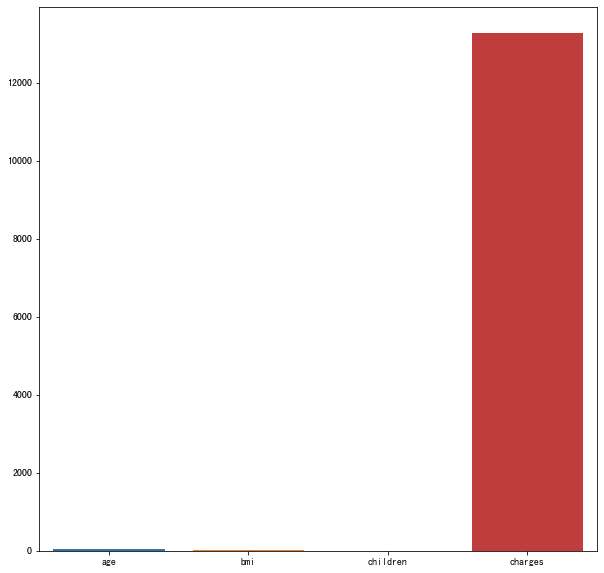

In [5]:
draw_bar_chart_plot(df_sample)

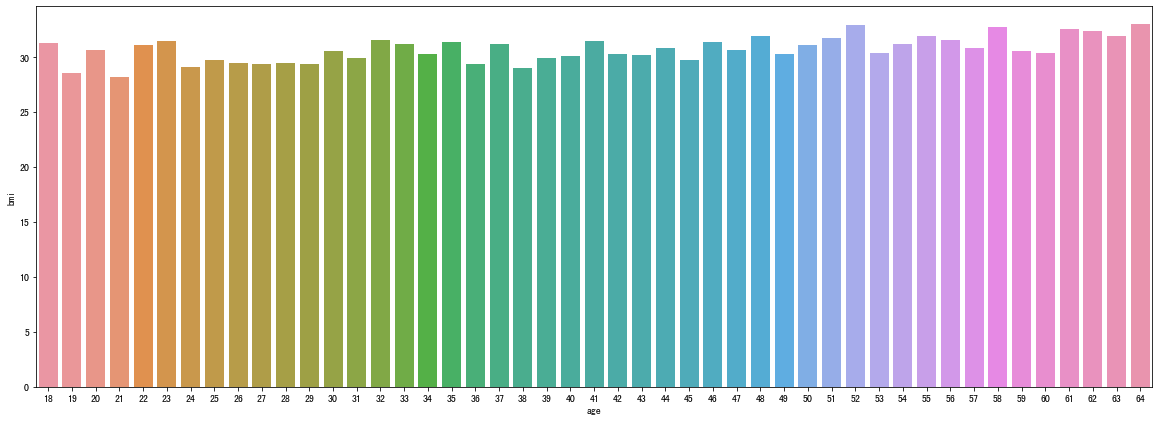

In [6]:
draw_bar_chart_plot(df_sample,x='age',y='bmi',fig_x=20,fig_y=7)

In [7]:
#折线图
def draw_line_plot(data,x=None,y=None,hue=None,ci=None,fig_x=10,fig_y=10,fig_title=None):
    
    '''
    Ref:
    https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot
    https://www.kaggle.com/alexisbcook/line-charts
    
    关键参数：
    df的输入格式：
        label_1,label2,...
     x[0],  y_1[0]   , y_2[0]
     x[1],  y_1[1]   , y_2[1]
     ...
    data:pandas DataFrame obj
        data的输入格式：
        label_1,  label2 , ...
         x[0]  ,  y_1[0] , y_2[0]
         x[1]  ,  y_1[1] , y_2[1]
         ...
    x:x坐标的name 
    y:y坐标的name
    hue:类别对应的column名字 
    ci:画图时采样的方式 ，ci==None时不用采样的方式获取观测值
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    
    '''
    
    
    #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
    #label===>设置图中label的标签
    if x==None or y==None:
        #没有指定列，则所有列全部被使用
        sns.lineplot(data=data,hue=hue,ci=ci)
    else:
        #直接使用df的对应列作为y坐标,label_name作为类名
        sns.lineplot(data=data,x=x,y=y,hue=hue,ci=ci)

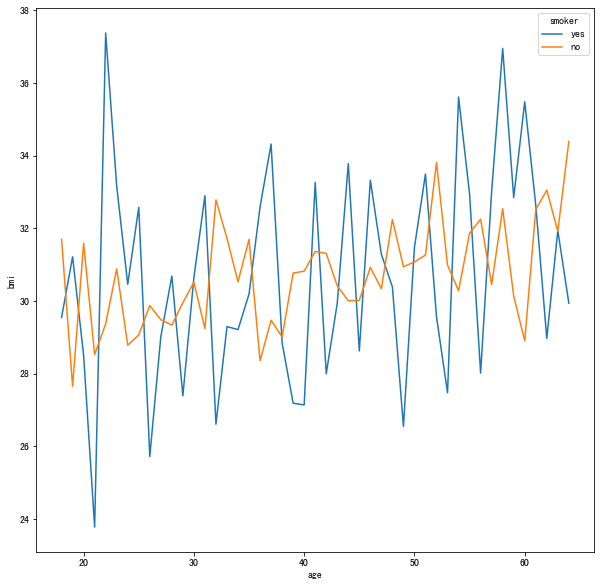

In [8]:
draw_line_plot(df_sample,x='age',y='bmi',hue='smoker')

In [9]:
#sample
import numpy as np
uniform_data = np.random.rand(10, 12)

In [10]:
#热图
def draw_heatmap(data,annot=False,fmt=None,vmin=None,vmax=None,cmap='YlGnBu',fig_x=10,fig_y=10,fig_title=None):
    '''
    Ref:
    https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap
    https://www.kaggle.com/alexisbcook/bar-charts-and-heatmaps

    关键参数：
    data:能够转化为2维ndarray,使用dataframe对象时headmap的横纵坐标的label从行列名中自动找出
    annot:图中是否标识出label值
    fmt:annot的格式，'d'表示整数格式,'.1f'表示小数（保留小数点后一位）
        annot和fmt一般要同时使用。
    vmin, vmax:热点图的bar中的最大值和最小值范围，不提供则自动统计
    cmap：热点图的颜色样式，如“YlGnBu”/"Wistia"
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)

    #直接使用df的对应列作为y坐标,label_name作为类名
    sns.heatmap(data=data,annot=annot,fmt=fmt,vmin=vmin,vmax=vmax,cmap=cmap)

    
    

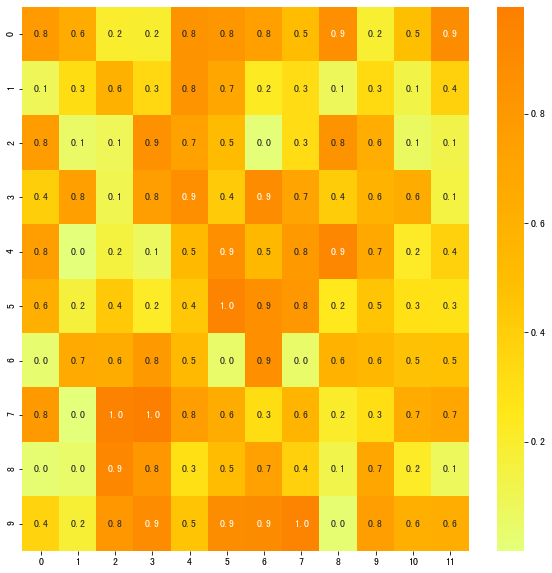

In [11]:
draw_heatmap(uniform_data,annot=True,fmt='.1f',cmap='Wistia')

In [12]:
#散点图
def draw_scatter_plot(data,x=None,y=None,hue=None,size=None,style=None,fig_x=10,fig_y=10,fig_title=None):

    '''
    Ref:
    https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot
    https://www.kaggle.com/alexisbcook/scatter-plots
    
    功能：通过x,y展示和(hue,size,style)等参数来展示不同子集之间的关系
    
    关键参数：
    data:能够转化为2维ndarray,使用dataframe对象时headmap的横纵坐标的label从行列名中自动找出
    x:明确data中的哪一列作为x轴
    y:明确data中的哪一列作为y轴
    hue:不同类别对应的column名字====>对应不同的色调 
    size:不同类别对应的column名字====>对应不同的大小（可通过sizes参数调节大小）
    style:不同类别对应的column名字====>对应不同的风格
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   

    #直接使用df
    if x==None and y==None:
        sns.scatterplot(data)
    else:
        sns.scatterplot(data=data,x=x,y=y,hue=hue,size=size,style=style)

    
    

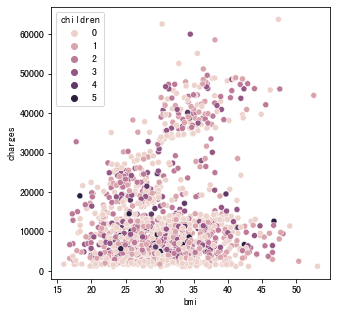

In [13]:
draw_scatter_plot(df_sample,x='bmi',y='charges',hue='children',fig_x=5,fig_y=5)

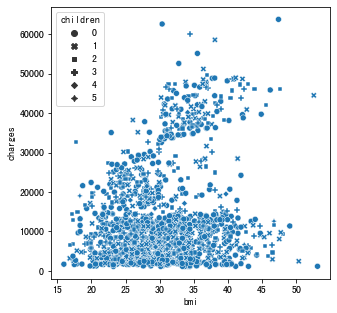

In [14]:
draw_scatter_plot(df_sample,x='bmi',y='charges',style='children',fig_x=5,fig_y=5)

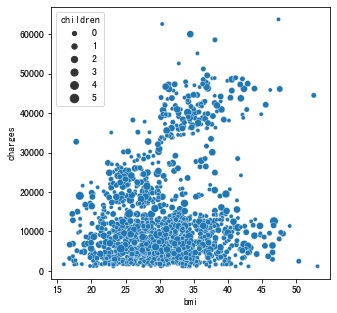

In [15]:
draw_scatter_plot(df_sample,x='bmi',y='charges',size='children',fig_x=5,fig_y=5)

In [16]:
#带有回归线的散点图
def draw_regplot(data,x,y,fig_x=10,fig_y=10,fig_title=None):
    '''
    Ref:
    https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
    https://www.kaggle.com/alexisbcook/scatter-plots
    
    功能：画出这些数据，同时画出这些数据的回归模型

    data:Dataframe格式的数据
    x:横坐标的列名
    y:纵坐标的列名
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.regplot(data=data,x=x,y=y)
    

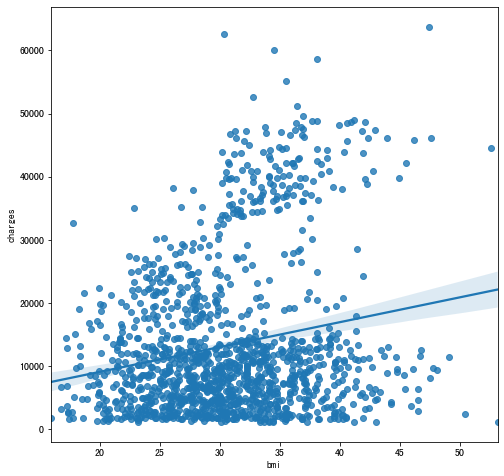

In [17]:
draw_regplot(df_sample,x='bmi',y='charges',fig_x=8,fig_y=8)

In [18]:
#带有多条回归线的散点图
def draw_lmplot(data,x,y,hue,fig_x=10,fig_y=10,fig_title=None):
    '''
    
    Ref:
    https://www.kaggle.com/alexisbcook/scatter-plots
    https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot
    
    功能：画出多组数据，同时画出多组数据的回归模型，

    data:Dataframe格式的数据
    x:横坐标的列名
    y:纵坐标的列名
    hue:不同类别对应的column名字====>对应不同的色调 
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.lmplot(data=data,x=x,y=y,hue=hue)
    

<Figure size 720x720 with 0 Axes>

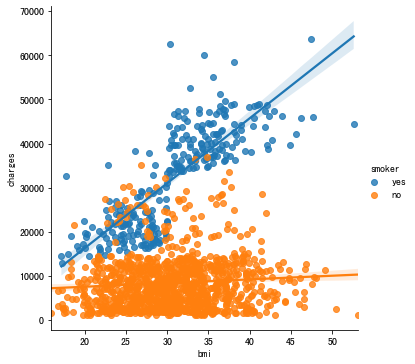

In [19]:
draw_lmplot(df_sample,x='bmi',y='charges',hue='smoker',fig_x=10,fig_y=10)

In [20]:
#群图
def draw_swarmplot(data,x,y,hue=None,fig_x=10,fig_y=10,fig_title=None):
    '''
    
    Ref:
    https://www.kaggle.com/alexisbcook/scatter-plots
    https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot
    
    功能：
    Draw a categorical scatterplot with non-overlapping points.
    画出一个不会有重合点的类别散点图
    
    data:Dataframe格式的数据
    x:横坐标的列名
    y:纵坐标的列名
    hue:不同类别对应的column名字====>对应不同的色调 
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.swarmplot(data=data,x=x,y=y,hue=hue)
    

/Users/van/anaconda/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


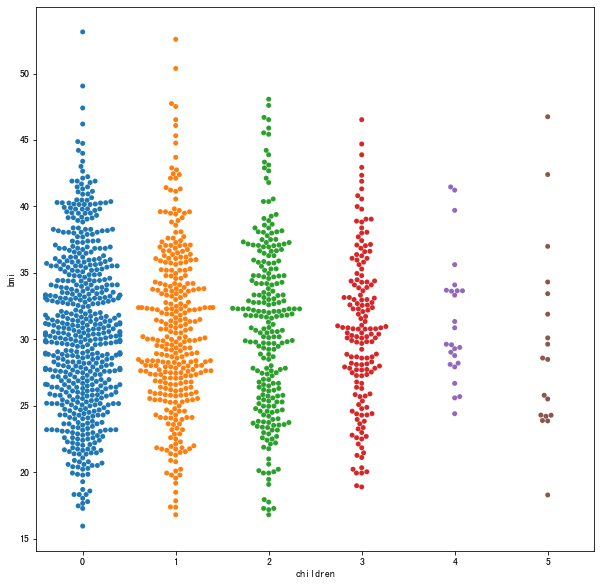

In [21]:
draw_swarmplot(df_sample,x='children',y='bmi')

/Users/van/anaconda/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


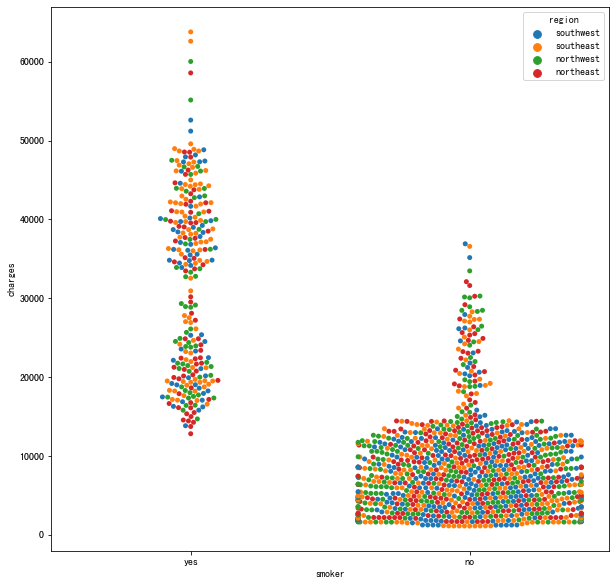

In [22]:
draw_swarmplot(df_sample,x='smoker',y='charges',hue='region')

In [23]:
#词云
def draw_wordcolud(allwords=None,fig_x=30,fig_y=10,fig_title=None):
    #Ref:
    #https://amueller.github.io/word_cloud/
    #
    #allwords:word list
    #
    #
    #WordCloud重要参数:
    #
    #min_font_size:最小的字体大小default=4
    #font_step:字体增长的step
    #max_words:能够画的最多的字
    #stopwords:停用词（不展示）
    #background_color:背景颜色
    #max_font_size:最大的字体尺寸
    #relative_scaling:字的相对大小，relative_scaling=0时，只考虑rank排名，relative_scaling=1字体大小和重要性的两倍成正比
    #           default=’auto’即relative_scaling=0.5，此时只考虑词的重要性
    #repeat：没有达到最大的词数量或者最小的字体大小时，是否重复词云中的word,default=False
    #include_numbers:是否包含数字default=False
    #
    #
    #fig_x:图的长
    #fig_y:图的宽
    #fig_title:图的标题

    #默认列表
    if not allwords:
        allwords={'好':1,'不好':0.001,'差':0.001,'优秀':1}
    #根据频率排序
    mostcommon = sorted(Counter(allwords).items(),key=lambda x:x[1],reverse=True)#[('好',0.1),('优秀',0.2),('不好',0.9),('差',0.8),]#FreqDist(allwords).most_common(100)#来自文本中出现频率最高的100个词

    #设置中文字体的路径
    font = '/Library/Fonts/Songti.ttc'
    
    
    wordcloud = WordCloud(width=1600, height=800,font_path=font,relative_scaling=1,repeat=True, background_color='white', stopwords=STOPWORDS).generate(str(mostcommon))

    fig = plt.figure(figsize=(fig_x,fig_y), facecolor='white')

    plt.imshow(wordcloud, interpolation="bilinear")

    #关掉坐标显示
    plt.axis('off')

    plt.title(fig_title, fontsize=50)
    #padding
    plt.tight_layout(pad=0)

    plt.show()

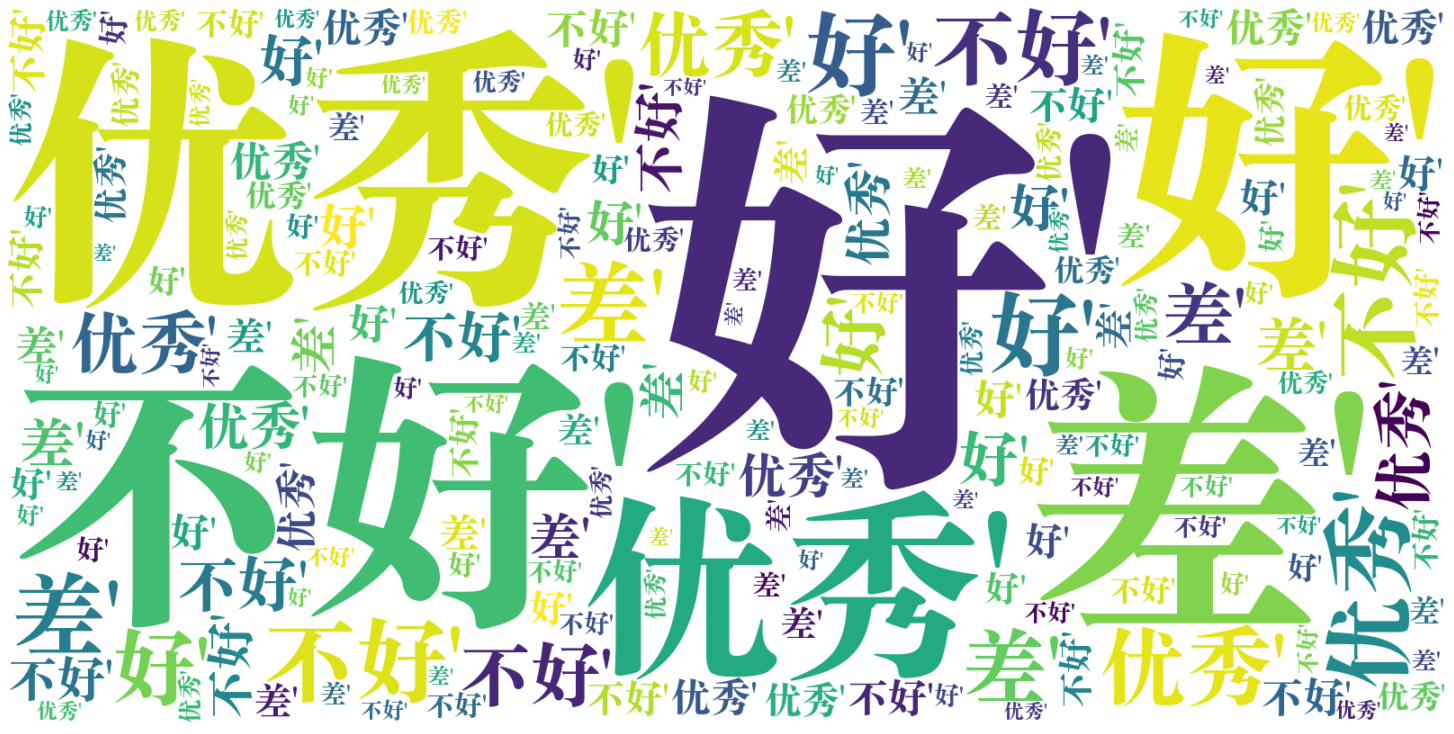

In [24]:
draw_wordcolud()

In [25]:
#密度分布图
def draw_kde_plot(data,x,y,hue=None,shade=True,fig_title=None,fig_x=10,fig_y=10):
    
    ''' 
    Ref:
    https://www.kaggle.com/alexisbcook/distributions
    https://seaborn.pydata.org/generated/seaborn.kdeplot.html
    
    功能：
    Plot univariate or bivariate distributions using kernel density estimation.
    使用核密度估计绘制单变量或双变量分布。
    用连续变量展示数据的分布。
    
    data:Dataframe格式的数据
    x:横坐标列名
    y:纵坐标列名
    shade：是否使用阴影
    hue:不同类别对应的column名字====>对应不同的色调 
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.kdeplot(data=data,x=x,y=y,hue=hue,shade=shade)
    
    

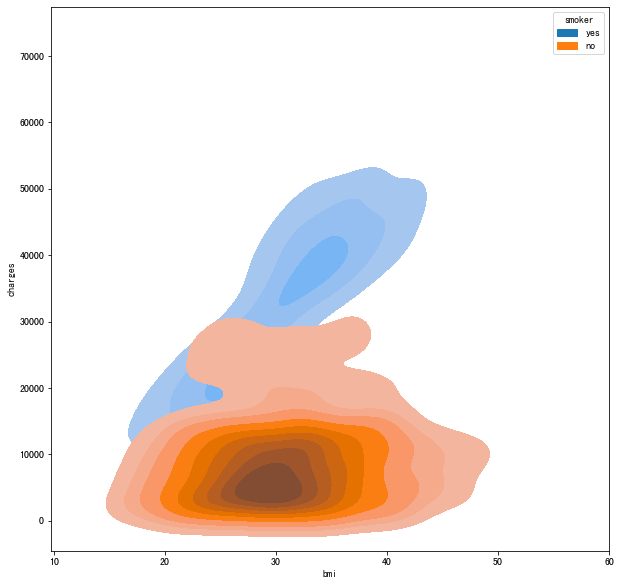

In [26]:
draw_kde_plot(df_sample,x='bmi',y='charges',hue='smoker')

In [27]:
#分布图
def draw_jointplot(data,x,y,hue=None,kind='kde',fig_title=None,fig_x=10,fig_y=10):
    
    '''
    
    Ref:
    https://www.kaggle.com/alexisbcook/distributions
    http://seaborn.pydata.org/generated/seaborn.jointplot.html
    
    功能:
    Draw a plot of two variables with bivariate and univariate graphs.
    用双变量和单变量图绘制两个变量的图。
    
    data:Dataframe格式的数据
    x:横坐标列名
    y:纵坐标列名
    shade：是否使用阴影
    hue:不同类别对应的column名字====>对应不同的色调 
    kind:不同种类的图，包括{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
    fig_x:图的长
    fig_y:图的宽
    fig_title:图的标题
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.jointplot(data=data,x=x,y=y,hue=hue,kind=kind)
    
    

<Figure size 720x720 with 0 Axes>

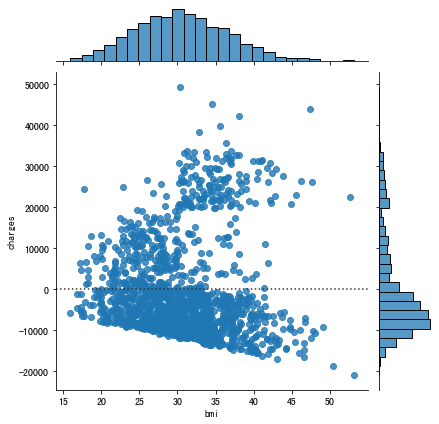

In [28]:
draw_jointplot(df_sample,x='bmi',y='charges',kind='resid')

<Figure size 720x720 with 0 Axes>

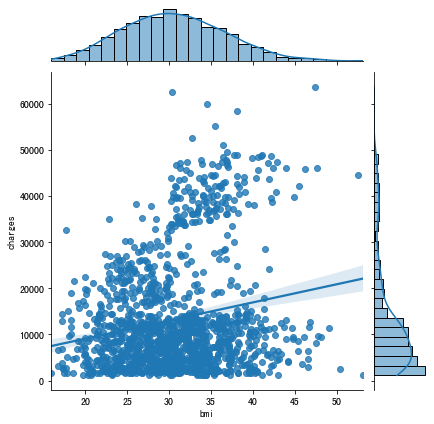

In [29]:
draw_jointplot(df_sample,x='bmi',y='charges',kind='reg')

<Figure size 720x720 with 0 Axes>

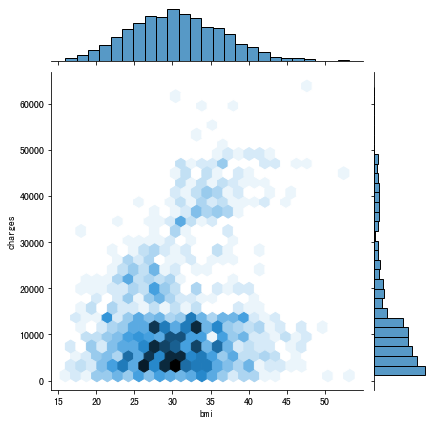

In [30]:
draw_jointplot(df_sample,x='bmi',y='charges',kind='hex')

<Figure size 1080x1080 with 0 Axes>

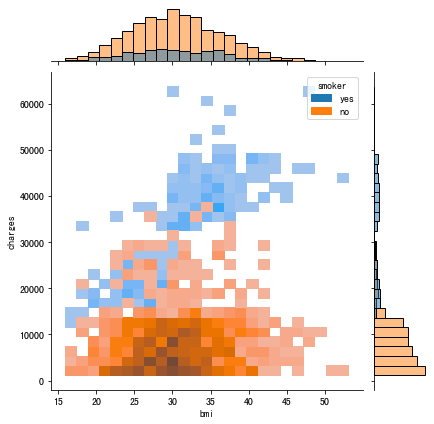

In [31]:
draw_jointplot(df_sample,x='bmi',y='charges',hue='smoker',kind='hist',fig_x=15,fig_y=15)

<Figure size 720x720 with 0 Axes>

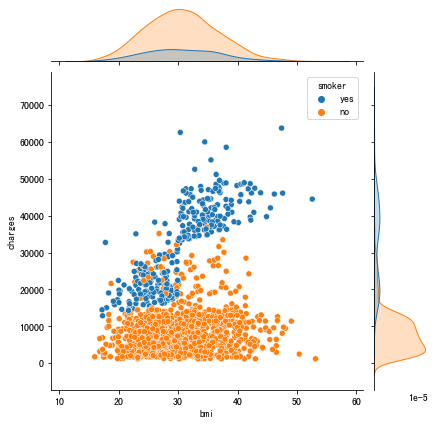

In [32]:
draw_jointplot(df_sample,x='bmi',y='charges',hue='smoker',kind='scatter')